# Keras Examples
Linear  Regression
Train  a one layer neural network for linear regression

In [1]:
'''
Linear Regression
'''
# Import the necessry libraries 

from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD

In [2]:
# Simulate some data as input dataset

def SimulData():
        # Simulate some data for training 
        x_train = np.arange(0,10, 0.25 )
        x_train = x_train + 1.0/3.0 * np.random.randn(x_train.size);
        y_train  = np.cos( x_train  * np.pi /7) +  0.1 * np.random.randn(x_train.size);

        x_test = np.arange(0,10, 0.5 )
        x_test = x_test + 1.0/3.0 * np.random.randn(x_test.size);
        y_test  = np.cos( x_test  * np.pi /7)+  0.1 * np.random.randn(x_test.size)

        return (x_train,y_train) , (x_test, y_test)
    
# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = SimulData();

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

40 train samples
20 test samples


In [3]:
# Defining the model 

# Define that it is a FF model
model = Sequential()   

# add a dense layer of weights
model.add(Dense(1, activation='linear', input_shape=(1,)))


# print the model 
model.summary()

# Define the optimizer
s1 = SGD(lr=0.01)

# Set up the model algorithm, loss, optimizer 
model.compile(loss='mse',
              optimizer=s1,
              metrics=['mse'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


Epoch 1/20
4/4 [==============================] - 0s 60ms/step - loss: 1.7927 - mse: 1.7927 - val_loss: 0.3258 - val_mse: 0.3258
Epoch 2/20
4/4 [==============================] - 0s 10ms/step - loss: 0.3683 - mse: 0.3683 - val_loss: 0.3124 - val_mse: 0.3124
Epoch 3/20
4/4 [==============================] - 0s 9ms/step - loss: 0.3589 - mse: 0.3589 - val_loss: 0.3021 - val_mse: 0.3021
Epoch 4/20
4/4 [==============================] - 0s 8ms/step - loss: 0.3453 - mse: 0.3453 - val_loss: 0.2925 - val_mse: 0.2925
Epoch 5/20
4/4 [==============================] - 0s 7ms/step - loss: 0.3340 - mse: 0.3340 - val_loss: 0.2838 - val_mse: 0.2838
Epoch 6/20
4/4 [==============================] - 0s 8ms/step - loss: 0.3253 - mse: 0.3253 - val_loss: 0.2750 - val_mse: 0.2750
Epoch 7/20
4/4 [==============================] - 0s 10ms/step - loss: 0.3256 - mse: 0.3256 - val_loss: 0.2812 - val_mse: 0.2812
Epoch 8/20
4/4 [==============================] - 0s 10ms/step - loss: 0.3185 - mse: 0.3185 - val_los

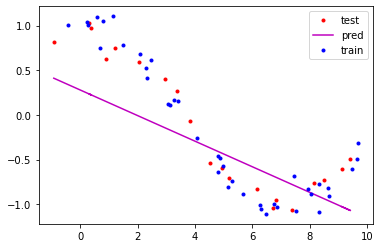

In [4]:
# Train the model
batch_size = 10
epochs = 20

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

# perform prediction using the test data
y_pred = model.predict(x_test);

# Find the loss
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])

# Plot the results
tst = plt.plot(x_test,y_test,'r.',label='test');
pred = plt.plot(x_test,y_pred,'m',label='pred');
tr = plt.plot(x_train,y_train,'b.',label='train');

plt.legend()
plt.show()


In [ ]:
'''
TODO - 1. Add one more layer of 50 hidden neurons 
          and compare the differences in the output
       2. Compare the effect of L1 and L2 regularization 
          on the neural network in part 1
       3. Understand the effect of dropout on the 
          neural network defined in part 1
''' 

<h2 style="color:blue;">1st Ans</h2>

In [5]:
def Model(x_train, y_train,x_test, y_test, batch_size, epochs, r):
    model = Sequential()
    
    model.add(Dense(50, activation='relu', input_shape=(1,)))
    model.add(Dense(1, activation='linear'))
    model.summary()
    
    # Set up the model algorithm, loss, optimizer 
    model.compile(loss='mse', optimizer=SGD(lr = r, decay=1e-6, momentum=0.9, nesterov=True))
    
    history = model.fit(x_train, y_train, batch_size, epochs)
    
    # perform prediction using the test data
    y_pred = model.predict(x_test);
    
    print("Test loss: ", model.evaluate(x_test, y_test))
    
    # Plot the results
    tst = plt.plot(x_test,y_test,'r.',label='test');
    pred = plt.plot(x_test,y_pred,'m',label='pred');
    tr = plt.plot(x_train,y_train,'b.',label='train');

    plt.legend()
    plt.show()

    
    return y_pred

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                100       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
4/4 [==============================] - 0s 3ms/step - loss: 1.1704
Epoch 2/50
4/4 [==============================] - 0s 0s/step - loss: 2.1423
Epoch 3/50
4/4 [==============================] - 0s 5ms/step - loss: 0.2849
Epoch 4/50
4/4 [==============================] - 0s 1ms/step - loss: 0.2576
Epoch 5/50
4/4 [==============================] - 0s 0s/step - loss: 0.2254
Epoch 6/50
4/4 [==============================] - 0s 4ms/step - loss: 0.1952
Epoch 7/50
4/4 [==============================] - 0s 0s/st

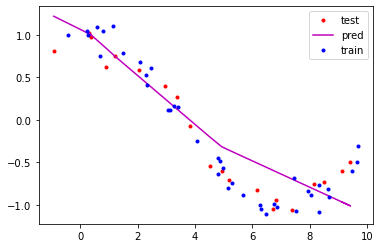

In [6]:
y_pred_1 = Model(x_train, y_train, x_test, y_test, 10, 50, 0.01)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 50)                100       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 51        
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
4/4 [==============================] - 0s 2ms/step - loss: 8.9546
Epoch 2/50
4/4 [==============================] - 0s 2ms/step - loss: 0.6371
Epoch 3/50
4/4 [==============================] - 0s 2ms/step - loss: 1.1188
Epoch 4/50
4/4 [==============================] - 0s 2ms/step - loss: 0.6903
Epoch 5/50
4/4 [==============================] - 0s 3ms/step - loss: 0.5059
Epoch 6/50
4/4 [==============================] - 0s 1ms/step - loss: 0.2698
Epoch 7/50
4/4 [==============================] - 0s 2ms

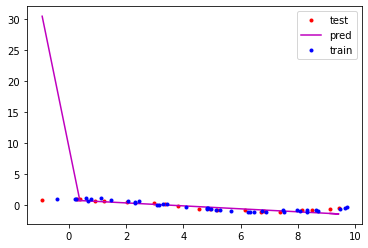

In [7]:
y_pred_2 = Model(x_train, y_train, x_test, y_test, 10, 50, 0.02)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 50)                100       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 51        
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________
Epoch 1/150
4/4 [==============================] - 0s 2ms/step - loss: 0.3756
Epoch 2/150
4/4 [==============================] - 0s 2ms/step - loss: 0.3379
Epoch 3/150
4/4 [==============================] - 0s 2ms/step - loss: 0.3046
Epoch 4/150
4/4 [==============================] - 0s 2ms/step - loss: 0.2871
Epoch 5/150
4/4 [==============================] - 0s 2ms/step - loss: 0.2691
Epoch 6/150
4/4 [==============================] - 0s 2ms/step - loss: 0.2407
Epoch 7/150
4/4 [==============================] -

4/4 [==============================] - 0s 2ms/step - loss: 0.1144
Epoch 97/150
4/4 [==============================] - 0s 2ms/step - loss: 0.1181
Epoch 98/150
4/4 [==============================] - 0s 2ms/step - loss: 0.1098
Epoch 99/150
4/4 [==============================] - 0s 2ms/step - loss: 0.1116
Epoch 100/150
4/4 [==============================] - 0s 2ms/step - loss: 0.1166
Epoch 101/150
4/4 [==============================] - 0s 2ms/step - loss: 0.1195
Epoch 102/150
4/4 [==============================] - 0s 3ms/step - loss: 0.1232
Epoch 103/150
4/4 [==============================] - 0s 3ms/step - loss: 0.1112
Epoch 104/150
4/4 [==============================] - 0s 3ms/step - loss: 0.1118
Epoch 105/150
4/4 [==============================] - 0s 3ms/step - loss: 0.1177
Epoch 106/150
4/4 [==============================] - 0s 3ms/step - loss: 0.1133
Epoch 107/150
4/4 [==============================] - 0s 3ms/step - loss: 0.1126
Epoch 108/150
4/4 [==============================] - 0s 2

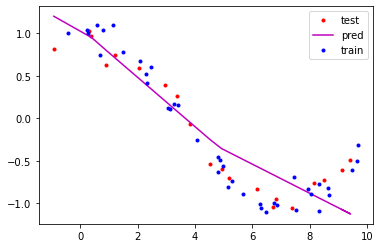

In [8]:
y_pred_3 = Model(x_train, y_train, x_test, y_test, 10, 150, 0.003)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 50)                100       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 51        
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
2/2 [==============================] - 0s 4ms/step - loss: 1.8729
Epoch 2/50
2/2 [==============================] - 0s 2ms/step - loss: 2.6709
Epoch 3/50
2/2 [==============================] - 0s 2ms/step - loss: 0.4645
Epoch 4/50
2/2 [==============================] - 0s 2ms/step - loss: 0.2944
Epoch 5/50
2/2 [==============================] - 0s 5ms/step - loss: 0.2651
Epoch 6/50
2/2 [==============================] - 0s 2ms/step - loss: 0.2058
Epoch 7/50
2/2 [==============================] - 0s 4ms

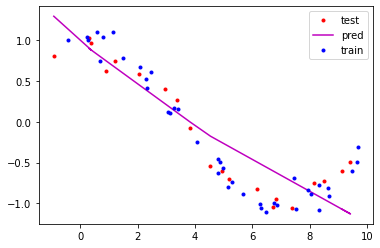

In [9]:
y_pred_4 = Model(x_train, y_train, x_test, y_test, 20, 50, 0.02)

<h2 style="color:blue;">2nd Ans</h2>

In [27]:
from keras import regularizers

def Model_Reg(x_train, y_train,x_test, y_test, batch_size, epochs, r, l):
    model = Sequential()
    
    model.add(Dense(50, activation='relu', input_shape=(1,), kernel_regularizer=regularizers.l1(l), 
                    activity_regularizer=regularizers.l2(l)))
    
    model.add(Dense(1, activation='linear'))
    model.summary()
    
    # Set up the model algorithm, loss, optimizer 
    model.compile(loss='mse', optimizer=SGD(lr = r))
    
    history = model.fit(x_train, y_train, batch_size, epochs)
    
    # perform prediction using the test data
    y_pred = model.predict(x_test);
    
    print("Test loss: ", model.evaluate(x_test, y_test))
    
    # Plot the results
    tst = plt.plot(x_test,y_test,'r.',label='test');
    pred = plt.plot(x_test,y_pred,'m',label='pred');
    tr = plt.plot(x_train,y_train,'b.',label='train');

    plt.legend()
    plt.show()

    
    return y_pred

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 50)                100       
_________________________________________________________________
dense_30 (Dense)             (None, 1)                 51        
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________
Epoch 1/150
4/4 [==============================] - 0s 2ms/step - loss: 0.7461
Epoch 2/150
4/4 [==============================] - 0s 2ms/step - loss: 2.2716
Epoch 3/150
4/4 [==============================] - 0s 4ms/step - loss: 5.1278
Epoch 4/150
4/4 [==============================] - 0s 2ms/step - loss: 0.3913
Epoch 5/150
4/4 [==============================] - 0s 2ms/step - loss: 0.3645
Epoch 6/150
4/4 [==============================] - 0s 4ms/step - loss: 0.3477
Epoch 7/150
4/4 [==============================] 

4/4 [==============================] - 0s 2ms/step - loss: 0.1230
Epoch 98/150
4/4 [==============================] - 0s 2ms/step - loss: 0.1565
Epoch 99/150
4/4 [==============================] - 0s 2ms/step - loss: 0.1355
Epoch 100/150
4/4 [==============================] - 0s 4ms/step - loss: 0.1227
Epoch 101/150
4/4 [==============================] - 0s 2ms/step - loss: 0.1250
Epoch 102/150
4/4 [==============================] - 0s 2ms/step - loss: 0.1207
Epoch 103/150
4/4 [==============================] - 0s 2ms/step - loss: 0.1236
Epoch 104/150
4/4 [==============================] - 0s 2ms/step - loss: 0.1234
Epoch 105/150
4/4 [==============================] - 0s 2ms/step - loss: 0.1334
Epoch 106/150
4/4 [==============================] - 0s 2ms/step - loss: 0.1267
Epoch 107/150
4/4 [==============================] - 0s 3ms/step - loss: 0.1256
Epoch 108/150
4/4 [==============================] - 0s 1ms/step - loss: 0.1587
Epoch 109/150
4/4 [==============================] - 0s 

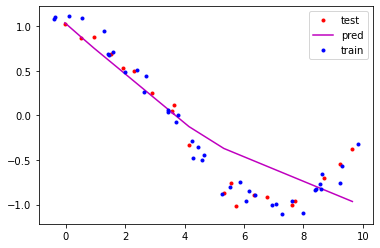

In [28]:
y_pred_r = Model_Reg(x_train, y_train,x_test, y_test, 10, 150, 0.02, 0.01)

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 50)                100       
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 51        
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________
Epoch 1/150
4/4 [==============================] - 0s 2ms/step - loss: 1.6971
Epoch 2/150
4/4 [==============================] - 0s 2ms/step - loss: 0.7452
Epoch 3/150
4/4 [==============================] - 0s 2ms/step - loss: 0.6870
Epoch 4/150
4/4 [==============================] - 0s 2ms/step - loss: 0.6801
Epoch 5/150
4/4 [==============================] - 0s 4ms/step - loss: 0.6335
Epoch 6/150
4/4 [==============================] - 0s 2ms/step - loss: 0.6217
Epoch 7/150
4/4 [==============================] 

4/4 [==============================] - 0s 2ms/step - loss: 0.1514
Epoch 98/150
4/4 [==============================] - 0s 2ms/step - loss: 0.1579
Epoch 99/150
4/4 [==============================] - 0s 2ms/step - loss: 0.1556
Epoch 100/150
4/4 [==============================] - 0s 2ms/step - loss: 0.1489
Epoch 101/150
4/4 [==============================] - 0s 2ms/step - loss: 0.1533
Epoch 102/150
4/4 [==============================] - 0s 2ms/step - loss: 0.1613
Epoch 103/150
4/4 [==============================] - 0s 2ms/step - loss: 0.1489
Epoch 104/150
4/4 [==============================] - 0s 4ms/step - loss: 0.1511
Epoch 105/150
4/4 [==============================] - 0s 2ms/step - loss: 0.1553
Epoch 106/150
4/4 [==============================] - 0s 2ms/step - loss: 0.1454
Epoch 107/150
4/4 [==============================] - 0s 2ms/step - loss: 0.1469
Epoch 108/150
4/4 [==============================] - 0s 2ms/step - loss: 0.1487
Epoch 109/150
4/4 [==============================] - 0s 

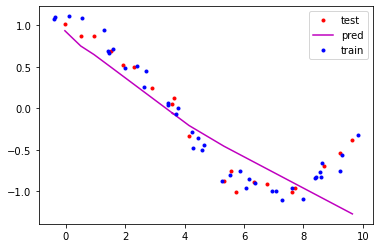

In [22]:
y_pred_r1 = Model_Reg(x_train, y_train,x_test, y_test, 10, 150, 0.001)

In [4]:
#l2 regul.

from keras import regularizers
# Defining the model 

# Define that it is a FF model
model_2 = Sequential()   

# add a dense layer of weights
model_2.add(Dense(50, activation='linear', input_shape=(1,),kernel_regularizer=regularizers.l2(0.01)))
model_2.add(Dense(1))


# print the model 
model_2.summary()

# Define the optimizer
s3 = SGD(lr=0.01)

# Set up the model algorithm, loss, optimizer 
model_2.compile(loss='mse',
              optimizer=s3,
              metrics=['mse'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                100       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


In [6]:
# Train the model
batch_size = 10
epochs1 = 40

history2 = model_2.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs1,
                    verbose=1,
                    validation_data=(x_test, y_test))

# perform prediction using the test data
y_pred2 = model_2.predict(x_test);

# Find the loss
score2 = model_2.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score2[0])


Epoch 1/40
4/4 [==============================] - 0s 15ms/step - loss: 0.1615 - mse: 0.1513 - val_loss: 0.2910 - val_mse: 0.2810
Epoch 2/40
4/4 [==============================] - 0s 7ms/step - loss: 0.3566 - mse: 0.3465 - val_loss: 0.2624 - val_mse: 0.2523
Epoch 3/40
4/4 [==============================] - 0s 7ms/step - loss: 0.2504 - mse: 0.2404 - val_loss: 0.2034 - val_mse: 0.1935
Epoch 4/40
4/4 [==============================] - 0s 8ms/step - loss: 0.1776 - mse: 0.1676 - val_loss: 0.2592 - val_mse: 0.2494
Epoch 5/40
4/4 [==============================] - 0s 8ms/step - loss: 0.2463 - mse: 0.2364 - val_loss: 0.2842 - val_mse: 0.2744
Epoch 6/40
4/4 [==============================] - 0s 7ms/step - loss: 0.1903 - mse: 0.1804 - val_loss: 0.3374 - val_mse: 0.3275
Epoch 7/40
4/4 [==============================] - 0s 7ms/step - loss: 0.2558 - mse: 0.2460 - val_loss: 0.2006 - val_mse: 0.1908
Epoch 8/40
4/4 [==============================] - 0s 7ms/step - loss: 0.1623 - mse: 0.1526 - val_loss: 

In [9]:
#l1 regul.

from keras import regularizers
# Defining the model 

# Define that it is a FF model
model_21 = Sequential()   

# add a dense layer of weights
model_21.add(Dense(50, activation='linear', input_shape=(1,),kernel_regularizer=regularizers.l1(0.01)))
model_21.add(Dense(1))


# print the model 
model_21.summary()

# Define the optimizer
s31 = SGD(lr=0.01)

# Set up the model algorithm, loss, optimizer 
model_21.compile(loss='mse',
              optimizer=s31,
              metrics=['mse'])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 50)                100       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 51        
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


In [10]:
# Train the model
batch_size = 10
epochs1 = 40

history21 = model_21.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs1,
                    verbose=1,
                    validation_data=(x_test, y_test))

# perform prediction using the test data
y_pred21 = model_21.predict(x_test);

# Find the loss
score21 = model_21.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score21[0])


Epoch 1/40
4/4 [==============================] - 0s 20ms/step - loss: 13.8695 - mse: 13.7922 - val_loss: 6.5347 - val_mse: 6.4748
Epoch 2/40
4/4 [==============================] - 0s 4ms/step - loss: 1.3281 - mse: 1.2708 - val_loss: 0.3609 - val_mse: 0.3048
Epoch 3/40
4/4 [==============================] - 0s 4ms/step - loss: 0.3305 - mse: 0.2744 - val_loss: 0.3547 - val_mse: 0.2987
Epoch 4/40
4/4 [==============================] - 0s 4ms/step - loss: 0.3069 - mse: 0.2510 - val_loss: 0.3341 - val_mse: 0.2783
Epoch 5/40
4/4 [==============================] - 0s 9ms/step - loss: 0.3093 - mse: 0.2536 - val_loss: 0.4012 - val_mse: 0.3456
Epoch 6/40
4/4 [==============================] - 0s 5ms/step - loss: 0.3701 - mse: 0.3146 - val_loss: 0.3139 - val_mse: 0.2588
Epoch 7/40
4/4 [==============================] - 0s 5ms/step - loss: 0.3080 - mse: 0.2529 - val_loss: 0.2941 - val_mse: 0.2391
Epoch 8/40
4/4 [==============================] - 0s 4ms/step - loss: 0.2746 - mse: 0.2197 - val_loss

# 3rd ans

In [11]:

# Defining the model 

# Define that it is a FF model
model_3 = Sequential()   

# add a dense layer of weights
model_3.add(Dense(50, activation='linear', input_shape=(1,)))
model_3.add(Dropout(0.25))
model_3.add(Dense(1))


# print the model 
model_3.summary()

# Define the optimizer
s4 = SGD(lr=0.01)

# Set up the model algorithm, loss, optimizer 
model_3.compile(loss='mse',
              optimizer=s4,
              metrics=['mse'])

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 50)                100       
_________________________________________________________________
dropout (Dropout)            (None, 50)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 51        
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


In [12]:
# Train the model
batch_size = 10
epochs1 = 40

history3 = model_3.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs1,
                    verbose=1,
                    validation_data=(x_test, y_test))

# perform prediction using the test data
y_pred3 = model_3.predict(x_test);

# Find the loss
score3 = model_3.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score3[0])


Epoch 1/40
4/4 [==============================] - 0s 19ms/step - loss: 13.0276 - mse: 13.0276 - val_loss: 7.9960 - val_mse: 7.9960
Epoch 2/40
4/4 [==============================] - 0s 4ms/step - loss: 2.4141 - mse: 2.4141 - val_loss: 0.3688 - val_mse: 0.3688
Epoch 3/40
4/4 [==============================] - 0s 4ms/step - loss: 0.6788 - mse: 0.6788 - val_loss: 0.3573 - val_mse: 0.3573
Epoch 4/40
4/4 [==============================] - 0s 4ms/step - loss: 0.4652 - mse: 0.4652 - val_loss: 0.3561 - val_mse: 0.3561
Epoch 5/40
4/4 [==============================] - 0s 4ms/step - loss: 0.3545 - mse: 0.3545 - val_loss: 0.3117 - val_mse: 0.3117
Epoch 6/40
4/4 [==============================] - 0s 4ms/step - loss: 0.4868 - mse: 0.4868 - val_loss: 0.3038 - val_mse: 0.3038
Epoch 7/40
4/4 [==============================] - 0s 4ms/step - loss: 0.4490 - mse: 0.4490 - val_loss: 0.2935 - val_mse: 0.2935
Epoch 8/40
4/4 [==============================] - 0s 4ms/step - loss: 0.4261 - mse: 0.4261 - val_loss